# Deep Learning - Yapay Sinir Aglari

 Bugün insan beyninin öğrenme modelini taklit ederek öğrenen yapay sinir ağlarını derinlemesine öğreneceğiz

In [1]:
#pip install tensorflow

In [2]:
!python --version

Python 3.9.23


## Classification

In [3]:
#pip install pandas

In [4]:
import pandas as pd

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is EA81-4F3B

 Directory of C:\Users\USER\Desktop\Artificial_Intelligence_Course\day5

26.07.2025  12:43    <DIR>          .
26.07.2025  08:29    <DIR>          ..
26.07.2025  10:26    <DIR>          .ipynb_checkpoints
26.07.2025  12:42           141.824 cars.xls
26.07.2025  12:43            86.469 DeepLearning.ipynb
26.07.2025  09:08        22.866.233 deeplearning-?????.pdf
26.07.2025  09:07               242 ExampleData.csv
26.07.2025  09:07         3.448.050 kc_house.pkl
26.07.2025  10:41            35.575 Normalization-PCA.ipynb
26.07.2025  09:07               312 PastHires.csv
26.07.2025  09:07            23.873 pima-indians-diabetes.csv
               8 File(s)     26.602.578 bytes
               3 Dir(s)  123.031.441.408 bytes free


In [6]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Dense

In [12]:
x = df.drop('Outcome', axis = 1)
y = df[['Outcome']]

In [13]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
df.shape

(768, 9)

In [17]:
model = Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='relu'))  
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [18]:
history = model.fit(x ,y , epochs = 250, batch_size = 32 , validation_split = 0.10 , verbose = 0)

In [19]:
#history.history['accuracy']

In [20]:
# Bütün veriler normalize edilmeli

In [21]:
from sklearn.preprocessing import normalize, scale

In [22]:
x = scale(x)

In [23]:
history = model.fit(x ,y , epochs = 250, batch_size = 32 , validation_split = 0.10 , verbose = 0)

In [24]:
#history.history['accuracy']

In [25]:
#pip install matplotlib

In [26]:
import matplotlib.pyplot as plt

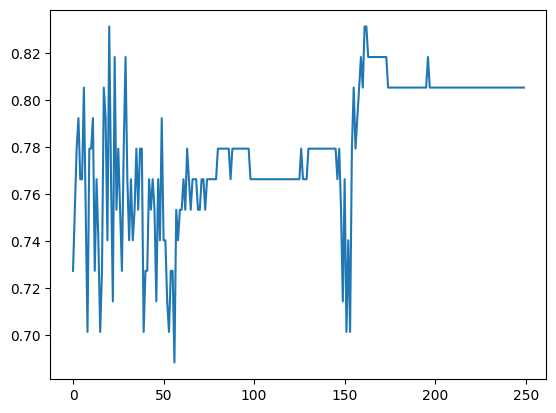

In [27]:
plt.plot(history.history['val_accuracy'])

In [28]:
# Regression

In [29]:
df = pd.read_pickle('kc_house.pkl')

In [30]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
x = df.drop('price' , axis = 1)
y = df[['price']]

In [32]:
x = scale(x)

In [33]:
model = Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))  
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1)) # regression da sigmoid yazmayacak

model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
history = model.fit(x_train ,y_train , epochs = 15, batch_size = 32 , validation_split = 0.10 , verbose = 1)

Epoch 1/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 193733672960.0000 - val_loss: 11063007232.0000
Epoch 2/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 9528108032.0000 - val_loss: 10636203008.0000
Epoch 3/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 8355278336.0000 - val_loss: 9420010496.0000
Epoch 4/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 7780976640.0000 - val_loss: 9188189184.0000
Epoch 5/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 7790489088.0000 - val_loss: 9367401472.0000
Epoch 6/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 7320950784.0000 - val_loss: 8635452416.0000
Epoch 7/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 7539787776.0000 - val_loss: 8589892096.0000
Epoch 8/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 7125841408.0000 - val_loss: 8502445568.0000
Epoch 9/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 7049095680.0000 - val_loss: 8372907008.0000
Epoch 10/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [37]:
tahmin = model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step


In [38]:
from sklearn.metrics import r2_score , mean_squared_error

In [39]:
r2=r2_score(y_test , tahmin)

In [40]:
r2

0.8427413105964661

In [41]:
mean_squared_error = mean_squared_error(y_test , tahmin )**.5

In [42]:
 mean_squared_error

89722.80726771761

In [44]:
pip install xlrd

  Using cached xlrd-2.0.2-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached xlrd-2.0.2-py2.py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


In [45]:
df = pd.read_excel('cars.xls')

In [46]:
x = df.drop('Price', axis = True)
y = df[['Price']]

In [47]:
x = pd.get_dummies(x , drop_first = True)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
x = StandardScaler().fit_transform(x)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))  
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) 

model.compile(loss='mean_squared_error', optimizer='adam')